# CHIKIN Dataset Generator

## Import Necessary Libraries

In [2]:
from duckduckgo_search import DDGS
from PIL import Image
import matplotlib.pyplot as plt
import requests

## Functions for searching photos and downloading them

In [3]:
def search_images(keywords, max_images=200):
    with DDGS() as ddgs:
        results = ddgs.images(keywords, max_results=max_images)
        return [r['image'] for r in results]

def download_image(url, filepath):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        with open(filepath, 'wb') as f:
            f.write(response.content)
        return True
    except Exception as e:
        print(f"Failed to download {url}: {e}")
        return False

## Trying on a single image

(np.float64(-0.5), np.float64(1599.5), np.float64(1156.5), np.float64(-0.5))

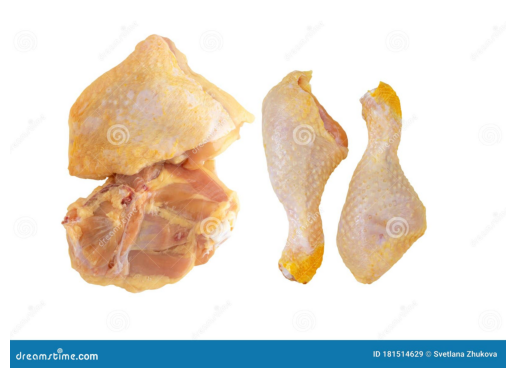

In [4]:
test_search_name = "raw chicken legs with thighs"
test = search_images(test_search_name, max_images=1)
dest = 'test.jpg'

download_image(test[0], dest)

img = Image.open(dest)
plt.imshow(img)
plt.axis(False)

## Making the dataset

In [ ]:
from tqdm.auto import tqdm
import time
from pathlib import Path

MAX_IMAGES = 200

searches = (
    'raw chicken legs', 
    'raw chicken wings', 
    'raw chicken breasts', 
    'raw chicken thighs', 
    'raw chicken drumsticks',
    'raw chicken feet',
    'raw chicken neck'
)

path = Path('data/raw-siken-200')

if not path.is_dir():
    for search_term in tqdm(searches):
        dest_dir = path / search_term
        dest_dir.mkdir(parents=True, exist_ok=True)
        
        urls = search_images(f'{search_term} photo', max_images=MAX_IMAGES)
        
        for i, url in enumerate(urls):
            filename = dest_dir / f'{i+1}.jpg'
            download_image(url, filename)
        
        time.sleep(5)  # delay to avoid rate-limiting

  0%|          | 0/7 [00:08<?, ?it/s]


KeyboardInterrupt: 

## Counting images

In [6]:
from pathlib import Path

def count_images(folder_path):
    folder = Path(folder_path)
    if not folder.exists():
        return 0
    
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.webp']
    image_files = [f for f in folder.iterdir() if f.is_file() and f.suffix.lower() in image_extensions]
    
    return len(image_files)

In [7]:
for folder in path.iterdir():
    if folder.is_dir():
        num = count_images(folder)
        print(f"{folder.name}: {num} images")


raw chicken legs: 0 images
